<a href="https://colab.research.google.com/github/TJTomas/DSPS_TTomaszewski/blob/main/Labs/Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) =  keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_train.reshape(-1,28,28,1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

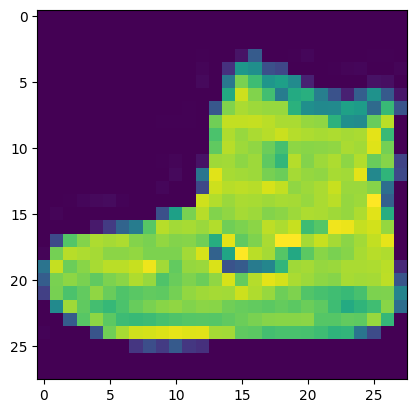

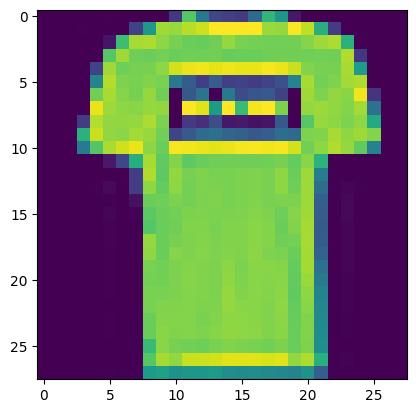

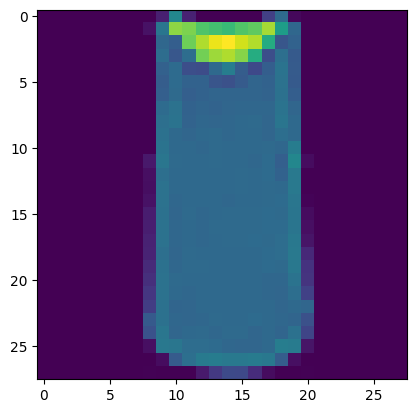

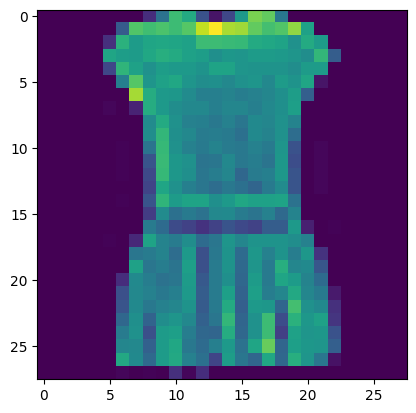

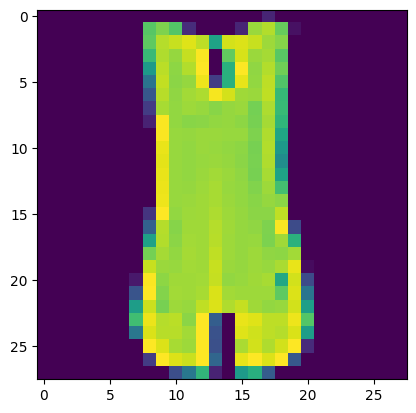

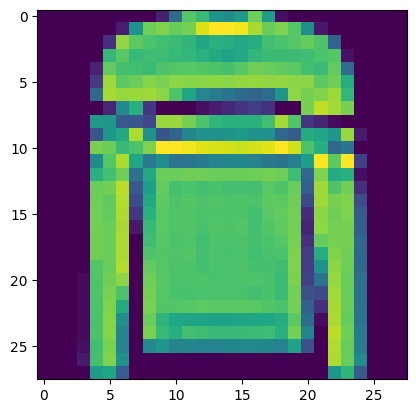

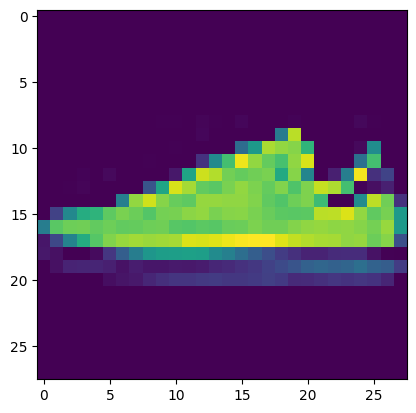

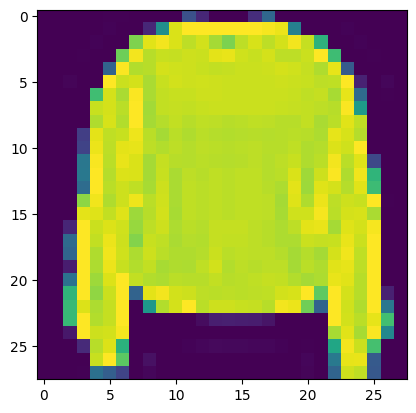

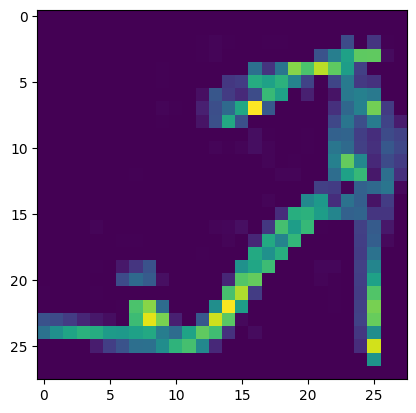

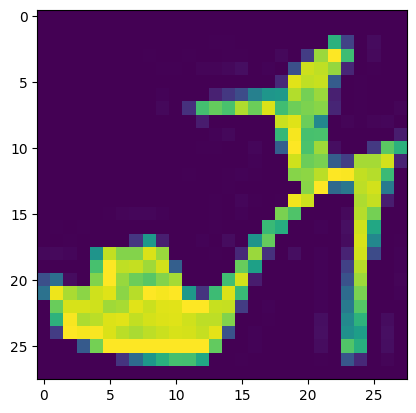

In [10]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

In [11]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [12]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [13]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [14]:
x_trainraveled.shape

(60000, 784)

In [15]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_train.shape[2]*x_train.shape[3])

In [17]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax'),
])

In [19]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1046 - loss: 2.3125 - val_accuracy: 0.1943 - val_loss: 2.2871
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2020 - loss: 2.1752 - val_accuracy: 0.4201 - val_loss: 1.6056
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4663 - loss: 1.4594 - val_accuracy: 0.5735 - val_loss: 1.1723
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5790 - loss: 1.1324 - val_accuracy: 0.6051 - val_loss: 1.0152
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6110 - loss: 0.9855 - val_accuracy: 0.6334 - val_loss: 0.9178
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6465 - loss: 0.9081 - val_accuracy: 0.6528 - val_loss: 0.8607
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6700 - loss: 0.8614 - val_accuracy: 0.6931 - val_loss: 0.8180
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6891 - loss: 0.8212 - val_accura

In [21]:
history.history

{'accuracy': [0.1146666631102562,
  0.25582221150398254,
  0.5053333044052124,
  0.5867778062820435,
  0.620711088180542,
  0.6536444425582886,
  0.6793333292007446,
  0.6936888694763184,
  0.7046444416046143,
  0.7132444381713867],
 'loss': [2.3027701377868652,
  1.9956170320510864,
  1.341577172279358,
  1.0915329456329346,
  0.9659501910209656,
  0.8925305604934692,
  0.8433942794799805,
  0.8106757998466492,
  0.785226583480835,
  0.7605715990066528],
 'val_accuracy': [0.1942666620016098,
  0.4201333224773407,
  0.5734666585922241,
  0.6051333546638489,
  0.633400022983551,
  0.6528000235557556,
  0.6931333541870117,
  0.7045333385467529,
  0.7093333601951599,
  0.7155333161354065],
 'val_loss': [2.2870800495147705,
  1.6055570840835571,
  1.1723225116729736,
  1.0151852369308472,
  0.9177614450454712,
  0.8606998920440674,
  0.8179829716682434,
  0.7926063537597656,
  0.7636469602584839,
  0.7482708692550659]}

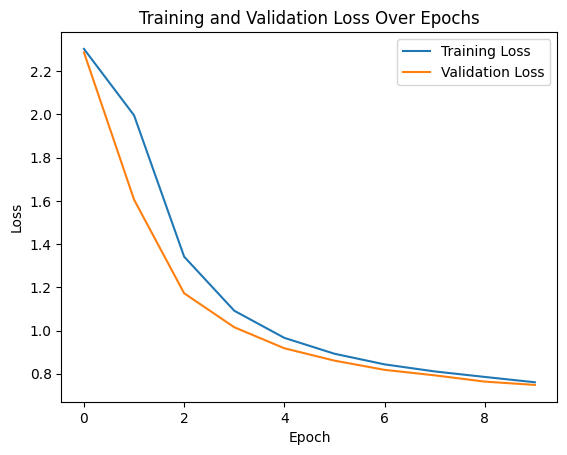

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()